In [46]:
import tsplib95 
import networkx as nx
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from itertools import combinations
warnings.filterwarnings("ignore", category=Warning)
import matplotlib.pyplot as plt
import numpy as np
problem = tsplib95.load('dantzig42.tsp')
G = problem.get_graph()

In [47]:
pos = problem.display_data
print(pos)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

{1: [170.0, 85.0], 2: [166.0, 88.0], 3: [133.0, 73.0], 4: [140.0, 70.0], 5: [142.0, 55.0], 6: [126.0, 53.0], 7: [125.0, 60.0], 8: [119.0, 68.0], 9: [117.0, 74.0], 10: [99.0, 83.0], 11: [73.0, 79.0], 12: [72.0, 91.0], 13: [37.0, 94.0], 14: [6.0, 106.0], 15: [3.0, 97.0], 16: [21.0, 82.0], 17: [33.0, 67.0], 18: [4.0, 66.0], 19: [3.0, 42.0], 20: [27.0, 33.0], 21: [52.0, 41.0], 22: [57.0, 59.0], 23: [58.0, 66.0], 24: [88.0, 65.0], 25: [99.0, 67.0], 26: [95.0, 55.0], 27: [89.0, 55.0], 28: [83.0, 38.0], 29: [85.0, 25.0], 30: [104.0, 35.0], 31: [112.0, 37.0], 32: [112.0, 24.0], 33: [113.0, 13.0], 34: [125.0, 30.0], 35: [135.0, 32.0], 36: [147.0, 18.0], 37: [147.5, 36.0], 38: [154.5, 45.0], 39: [157.0, 54.0], 40: [158.0, 61.0], 41: [172.0, 82.0], 42: [174.0, 87.0]}


In [34]:
#cover nearest neighbour after 2-opt
tour = [8, 5, 1, 37, 34, 33, 20, 19, 18, 14, 13, 16, 17, 21, 22, 12, 10, 27, 30, 8]

In [60]:
tour = [8, 5, 30, 27, 1, 37, 34, 10, 33, 22, 14, 12, 21, 17, 16, 18, 19, 20, 13]

In [63]:
tour = [1,3,8,25,24,11,23,17,13,14,16,18,19,20,21,28,30,32,34,35,37,38,39,40,41,1]

In [27]:
#2-opt
tour =[1, 42, 41, 40, 5, 4, 3, 9, 10, 12, 11, 23, 22, 17, 16, 13, 14, 15, 18, 19, 20, 21, 29, 28, 26, 27, 24, 25, 8, 7, 6, 31, 30, 32, 33, 34, 35, 36, 37, 38, 39, 2, 1]

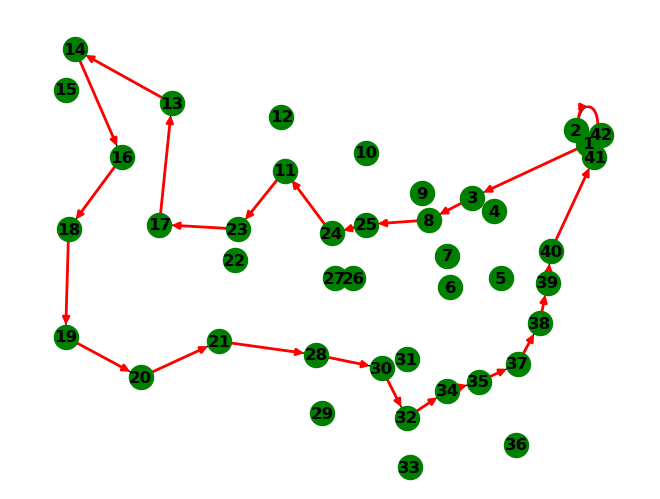

In [64]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for n, p in pos.items():
    G.add_node(n, pos=p)
for i in range(len(tour) - 1):
    G.add_edge(tour[i], tour[i + 1])
pos = nx.get_node_attributes(G, 'pos')
G.add_edge(tour[-1], tour[0])
####
nx.draw(G, pos, with_labels=True, node_color='g', font_weight='bold', arrows=False)

# 
path_edges = [(tour[n], tour[n + 1]) for n in range(len(tour) - 1)]
path_edges.append((tour[-1], tour[0]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2, 
                       arrowstyle='-|>', 
                       arrowsize=10)

plt.show()


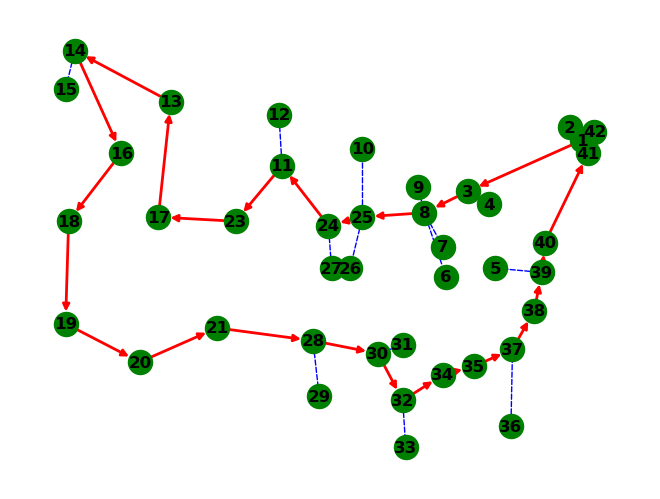

In [58]:
tour = [1,3,8,25,24,11,23,17,13,14,16,18,19,20,21,28,30,32,34,35,37,38,39,40,41,1]

# 构建图形
G = nx.DiGraph()

# 添加旅行路径中的点和边
for i in range(len(tour) - 1):
    G.add_edge(tour[i], tour[i + 1])
G.add_edge(tour[-1], tour[0])


# 使用虚线连接给定的点对
dashed_edges = [(1,2), (1,42), (3,4), (8,6), (8,7), (8,9), (11,12), (14,15), (24,27), 
                (25,10), (25,26), (28,29), (30,31), (32,33), (36,37), (39,5)]
for edge in dashed_edges:
    if G.has_edge(*edge):
        G[edge[0]][edge[1]]['style'] = 'dashed'
    else:
        G.add_edge(*edge, style='dashed')

# 画出图形的节点和所有的边
nx.draw(G, pos, with_labels=True, node_color='g', edge_color = 'white', font_weight='bold', arrows=False)

# 特别为旅行路径上的边上色
path_edges = [(tour[n], tour[n + 1]) for n in range(len(tour) - 1)]
path_edges.append((tour[-1], tour[0]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2, 
                       arrowstyle='-|>', arrowsize=10)

# 特别为虚线边使用虚线样式
nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, style = 'dashed', edge_color='b',arrowstyle='-')
plt.savefig("ExactCSP.jpg")

plt.show()
